#1) Perform sentimental analysis on the Elon-musk tweets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import spacy

from nltk.corpus import stopwords

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [ ]:
elon = pd.read_csv("Elon_musk.csv", encoding="ISO-8859-1")
elon.drop(columns='Unnamed: 0', inplace=True)
elon

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
elon['word_count'] = elon['Text'].apply(lambda x: len(str(x).split(' ')))
elon.head()

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')
elon['stopword_count']=elon['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
elon.head()

,Text,word_count,stopword_count
0,@kunalb11 Im an alien,4,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,4
2,@joerogan @Spotify Great interview!,4,0
3,@gtera27 Doge is underestimated,4,1
4,@teslacn Congratulations Tesla China for amazi...,17,5


In [ ]:
#No.of digits
elon['digits'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
elon.head()

,Text,word_count,stopword_count,digits
0,@kunalb11 Im an alien,4,1,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,4,0
2,@joerogan @Spotify Great interview!,4,0,0
3,@gtera27 Doge is underestimated,4,1,0
4,@teslacn Congratulations Tesla China for amazi...,17,5,0


In [ ]:
elon.digits.value_counts()

0     1854
1      117
2       23
3        3
4        1
10       1
Name: digits, dtype: int64

In [ ]:
#No. of URLs
elon['web_links'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('https://')]))
elon.head()

,Text,word_count,stopword_count,digits,web_links
0,@kunalb11 Im an alien,4,1,0,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,4,0,0
2,@joerogan @Spotify Great interview!,4,0,0,0
3,@gtera27 Doge is underestimated,4,1,0,0
4,@teslacn Congratulations Tesla China for amazi...,17,5,0,0


In [ ]:
elon.web_links.value_counts()

0    1356
1     632
2      11
Name: web_links, dtype: int64

In [ ]:
#No. of Hashtags
elon['hashtag'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
elon.head()

,Text,word_count,stopword_count,digits,web_links,hashtag
0,@kunalb11 Im an alien,4,1,0,0,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,4,0,0,0
2,@joerogan @Spotify Great interview!,4,0,0,0,0
3,@gtera27 Doge is underestimated,4,1,0,0,0
4,@teslacn Congratulations Tesla China for amazi...,17,5,0,0,0


In [ ]:
elon.hashtag.value_counts()

0    1990
1       5
2       3
4       1
Name: hashtag, dtype: int64

In [ ]:
elon = [Text.strip() for Text in elon.Text] # remove both the leading and the trailing characters
elon = [Text for Text in elon if Text] # removes empty strings, because they are considered in Python as False
elon[0:5]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

In [ ]:
elon_text = ' '.join(elon)
elon_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

#**2**

#Extract reviews of any product from ecommerce website like amazon
**Perform emotion mining**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import spacy

from nltk.corpus import stopwords
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [ ]:
headers = {'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',

}

In [ ]:
def get_soup(url):
    r = requests.get(url, headers=headers,  params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [ ]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
for x in tqdm_notebook(range(1,500)):
    soup = get_soup(f'https://www.amazon.in/Airdopes-121v2-Bluetooth-Immersive-Assistant/product-reviews/B08JQN8DGZ/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/499 [00:00<?, ?it/s]

In [ ]:
data=pd.DataFrame(reviewlist)
data.to_csv('Amzon_boat.csv',index=False)
data

,Rating,Title,Review,Review_Date
0,3.0,3.0 out of 5 stars\nA overall good product but...,I have tried several earbuds in the <1500Rs pr...,Reviewed in India 🇮🇳 on 10 February 2023
1,4.0,4.0 out of 5 stars\nfuture problems probably c...,i purchased it in the month of january 2023 an...,Reviewed in India 🇮🇳 on 28 June 2023
2,4.0,4.0 out of 5 stars\nGood for casual music purpose,The media could not be loaded.\n ...,Reviewed in India 🇮🇳 on 7 July 2023
3,4.0,4.0 out of 5 stars\nGood,"when using this product for regular calls, the...",Reviewed in India 🇮🇳 on 29 July 2023
4,4.0,4.0 out of 5 stars\nGOOD SOUND QUALITY IN THIS...,My suggestion is to buy this product in heavy ...,Reviewed in India 🇮🇳 on 21 July 2023
5,4.0,4.0 out of 5 stars\nWorks fine if you use fine,Bought 2 because I lost first one's case in a...,Reviewed in India 🇮🇳 on 15 July 2023
6,4.0,4.0 out of 5 stars\nQuality,"Build quality is just ok, and sound quality is...",Reviewed in India 🇮🇳 on 21 July 2023
7,4.0,4.0 out of 5 stars\nBoss Airdopes,"Airdopes is great, you can use it. Sometimes ...",Reviewed in India 🇮🇳 on 19 July 2023
8,4.0,4.0 out of 5 stars\nProduct,Product is good for use,Reviewed in India 🇮🇳 on 30 July 2023
9,4.0,4.0 out of 5 stars\nSound quality,It has the best sound quality,Reviewed in India 🇮🇳 on 31 July 2023


In [ ]:
data=pd.read_csv('Amzon_boat.csv')
data.head()

,Rating,Title,Review,Review_Date
0,3.0,3.0 out of 5 stars\nA overall good product but...,I have tried several earbuds in the <1500Rs pr...,Reviewed in India 🇮🇳 on 10 February 2023
1,4.0,4.0 out of 5 stars\nfuture problems probably c...,i purchased it in the month of january 2023 an...,Reviewed in India 🇮🇳 on 28 June 2023
2,4.0,4.0 out of 5 stars\nGood for casual music purpose,The media could not be loaded.\n ...,Reviewed in India 🇮🇳 on 7 July 2023
3,4.0,4.0 out of 5 stars\nGood,"when using this product for regular calls, the...",Reviewed in India 🇮🇳 on 29 July 2023
4,4.0,4.0 out of 5 stars\nGOOD SOUND QUALITY IN THIS...,My suggestion is to buy this product in heavy ...,Reviewed in India 🇮🇳 on 21 July 2023


In [ ]:
Review_date=[0]

word_list = ['Reviewed', 'in', 'India', '🇮🇳' , 'on']
repl_wrd = ''

for i in range(0, len(data)):
    new_string = ' '.join([repl_wrd if idx in word_list else idx for idx in data.Review_Date[i].split()])
    Review_date.append(new_string)

data['Review_Date'] = Review_date[1:]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       10 non-null     float64
 1   Title        10 non-null     object 
 2   Review       10 non-null     object 
 3   Review_Date  10 non-null     object 
dtypes: float64(1), object(3)
memory usage: 448.0+ bytes


In [ ]:
data.Rating.describe()

count    10.000000
mean      3.900000
std       0.316228
min       3.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       4.000000
Name: Rating, dtype: float64

In [ ]:
data.Review.isna().sum()

0

In [ ]:
data['Review'] = data['Review'].fillna(data['Title'])


review_date = [0]

for i in range(0, len(data)):
    a= data.Review_Date[i].strip()
    review_date.append(a)


data['Review_Date']= review_date[1:]

In [ ]:
#No. of words in each tweet
data ['word_count'] = data ['Review'].apply(lambda x: len(str(x).split(' ')))
data[['Rating', 'Review', 'word_count']] .head()

,Rating,Review,word_count
0,3.0,I have tried several earbuds in the <1500Rs pr...,737
1,4.0,i purchased it in the month of january 2023 an...,192
2,4.0,The media could not be loaded.\n ...,169
3,4.0,"when using this product for regular calls, the...",34
4,4.0,My suggestion is to buy this product in heavy ...,54


In [ ]:
#No. of Stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')
data['stopword_count']=data.Review.apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Rating', 'Review', 'word_count', 'stopword_count']].head()

,Rating,Review,word_count,stopword_count
0,3.0,I have tried several earbuds in the <1500Rs pr...,737,328
1,4.0,i purchased it in the month of january 2023 an...,192,96
2,4.0,The media could not be loaded.\n ...,169,39
3,4.0,"when using this product for regular calls, the...",34,15
4,4.0,My suggestion is to buy this product in heavy ...,54,20


In [ ]:
#No. of digits
data['digits'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits']].head()

,Rating,Review,word_count,stopword_count,digits
0,3.0,I have tried several earbuds in the <1500Rs pr...,737,328,3
1,4.0,i purchased it in the month of january 2023 an...,192,96,6
2,4.0,The media could not be loaded.\n ...,169,39,4
3,4.0,"when using this product for regular calls, the...",34,15,0
4,4.0,My suggestion is to buy this product in heavy ...,54,20,0


In [ ]:
#No. of URLs
data['web_links'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('https://')]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits', 'web_links']].head()

,Rating,Review,word_count,stopword_count,digits,web_links
0,3.0,I have tried several earbuds in the <1500Rs pr...,737,328,3,0
1,4.0,i purchased it in the month of january 2023 an...,192,96,6,0
2,4.0,The media could not be loaded.\n ...,169,39,4,0
3,4.0,"when using this product for regular calls, the...",34,15,0,0
4,4.0,My suggestion is to buy this product in heavy ...,54,20,0,0


In [ ]:
data.web_links.value_counts()

0    10
Name: web_links, dtype: int64

In [ ]:
#No. of Hashtag
data['hashtag'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits', 'web_links', 'hashtag']].head()

,Rating,Review,word_count,stopword_count,digits,web_links,hashtag
0,3.0,I have tried several earbuds in the <1500Rs pr...,737,328,3,0,0
1,4.0,i purchased it in the month of january 2023 an...,192,96,6,0,0
2,4.0,The media could not be loaded.\n ...,169,39,4,0,0
3,4.0,"when using this product for regular calls, the...",34,15,0,0,0
4,4.0,My suggestion is to buy this product in heavy ...,54,20,0,0,0


In [ ]:
data.hashtag.value_counts()

0    10
Name: hashtag, dtype: int64

In [ ]:
data['date'] = data['Review_Date'].str.split(' ').str[0]
data['Month'] = data['Review_Date'].str.split(' ').str[1]
data['Year'] = data['Review_Date'].str.split(' ').str[2]
data[['Review_Date', 'date', 'Month', 'Year']]

,Review_Date,date,Month,Year
0,10 February 2023,10,February,2023
1,28 June 2023,28,June,2023
2,7 July 2023,7,July,2023
3,29 July 2023,29,July,2023
4,21 July 2023,21,July,2023
5,15 July 2023,15,July,2023
6,21 July 2023,21,July,2023
7,19 July 2023,19,July,2023
8,30 July 2023,30,July,2023
9,31 July 2023,31,July,2023


In [ ]:
data

,Rating,Title,Review,Review_Date,word_count,stopword_count,digits,web_links,hashtag,date,Month,Year
0,3.0,3.0 out of 5 stars\nA overall good product but...,I have tried several earbuds in the <1500Rs pr...,10 February 2023,737,328,3,0,0,10,February,2023
1,4.0,4.0 out of 5 stars\nfuture problems probably c...,i purchased it in the month of january 2023 an...,28 June 2023,192,96,6,0,0,28,June,2023
2,4.0,4.0 out of 5 stars\nGood for casual music purpose,The media could not be loaded.\n ...,7 July 2023,169,39,4,0,0,7,July,2023
3,4.0,4.0 out of 5 stars\nGood,"when using this product for regular calls, the...",29 July 2023,34,15,0,0,0,29,July,2023
4,4.0,4.0 out of 5 stars\nGOOD SOUND QUALITY IN THIS...,My suggestion is to buy this product in heavy ...,21 July 2023,54,20,0,0,0,21,July,2023
5,4.0,4.0 out of 5 stars\nWorks fine if you use fine,Bought 2 because I lost first one's case in a...,15 July 2023,95,35,4,0,0,15,July,2023
6,4.0,4.0 out of 5 stars\nQuality,"Build quality is just ok, and sound quality is...",21 July 2023,28,11,1,0,0,21,July,2023
7,4.0,4.0 out of 5 stars\nBoss Airdopes,"Airdopes is great, you can use it. Sometimes ...",19 July 2023,32,19,0,0,0,19,July,2023
8,4.0,4.0 out of 5 stars\nProduct,Product is good for use,30 July 2023,5,2,0,0,0,30,July,2023
9,4.0,4.0 out of 5 stars\nSound quality,It has the best sound quality,31 July 2023,6,2,0,0,0,31,July,2023


In [ ]:
data1 = data[['Rating','Title','Review', 'date', 'Month', 'Year']]
data1

,Rating,Title,Review,date,Month,Year
0,3.0,3.0 out of 5 stars\nA overall good product but...,I have tried several earbuds in the <1500Rs pr...,10,February,2023
1,4.0,4.0 out of 5 stars\nfuture problems probably c...,i purchased it in the month of january 2023 an...,28,June,2023
2,4.0,4.0 out of 5 stars\nGood for casual music purpose,The media could not be loaded.\n ...,7,July,2023
3,4.0,4.0 out of 5 stars\nGood,"when using this product for regular calls, the...",29,July,2023
4,4.0,4.0 out of 5 stars\nGOOD SOUND QUALITY IN THIS...,My suggestion is to buy this product in heavy ...,21,July,2023
5,4.0,4.0 out of 5 stars\nWorks fine if you use fine,Bought 2 because I lost first one's case in a...,15,July,2023
6,4.0,4.0 out of 5 stars\nQuality,"Build quality is just ok, and sound quality is...",21,July,2023
7,4.0,4.0 out of 5 stars\nBoss Airdopes,"Airdopes is great, you can use it. Sometimes ...",19,July,2023
8,4.0,4.0 out of 5 stars\nProduct,Product is good for use,30,July,2023
9,4.0,4.0 out of 5 stars\nSound quality,It has the best sound quality,31,July,2023


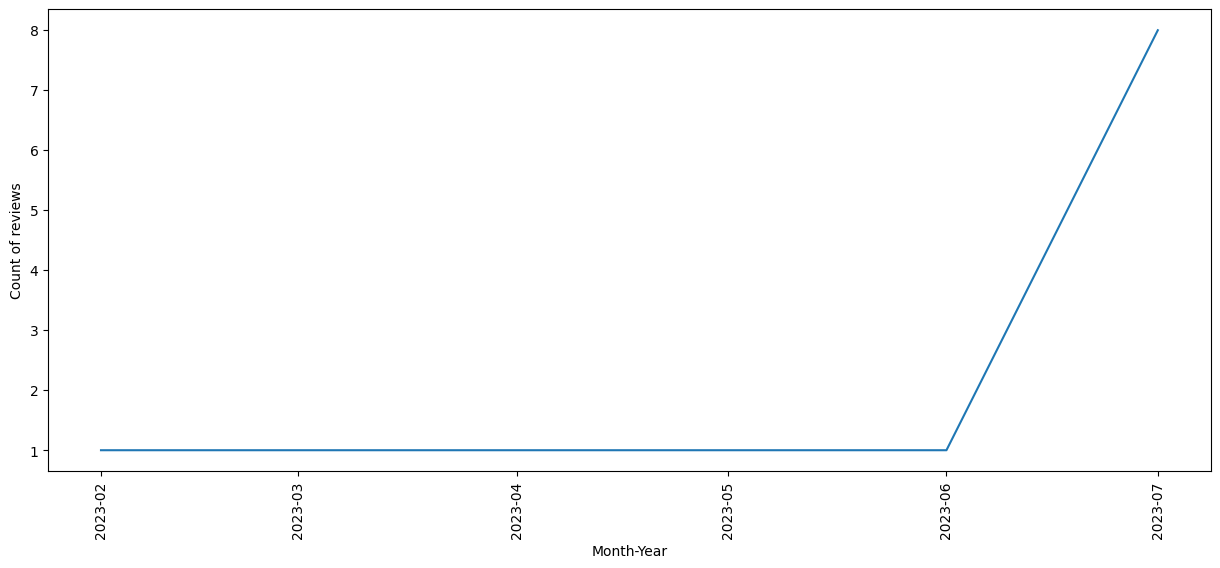

In [ ]:
data['Mo_Year'] = data['Month'] + ' ' + data['Year']
a = pd.DataFrame(data['Mo_Year'].value_counts() )
a = a.reset_index(level=0)
# convert to date
a['index'] = pd.to_datetime(a['index'])
a.sort_values(by='index').reset_index(drop=True)

a = a.rename(columns={'index':'month_year', 'Mo_Year': 'review_count'})
plt.figure(figsize=(15,6))
sns.lineplot(x=a.month_year, y=a.review_count)
plt.xlabel('Month-Year')
plt.ylabel('Count of reviews')
plt.xticks(rotation = 90 )
plt.show()

In [ ]:
data2= data1[['Review']]
data2

,Review
0,I have tried several earbuds in the <1500Rs pr...
1,i purchased it in the month of january 2023 an...
2,The media could not be loaded.\n ...
3,"when using this product for regular calls, the..."
4,My suggestion is to buy this product in heavy ...
5,Bought 2 because I lost first one's case in a...
6,"Build quality is just ok, and sound quality is..."
7,"Airdopes is great, you can use it. Sometimes ..."
8,Product is good for use
9,It has the best sound quality


In [ ]:
import re
corpus = []



for i in range(0, len(data2)):

    review = re.sub(r'[^\w\s]', '', data2.Review[i]) #remove punctuation
    review = review.lower() #normalise
    review = re.sub(r'\d', '', review) #remove digits

    corpus.append(review)

In [ ]:
corpus

['i have tried several earbuds in the rs price segment and without a doubt it is a good earbud for the price you pay but it has its own set of pros and cons so without further ado the pros and the cons of the product according to me are  marked points are important featuresdownsides of this earphonepros sound and bass the sound and bass of this earbud are exceptionally good for the price the sound and the bass can even be tuned by an eq to suit your audio needs from your phone but in windows i still havent found a way to change eq without using some third party software waterproof yes it is water proof but up to a certain water level and for a certain duration design this point is debatable for this earbud because of its large upper part though it sits comfortably in your ear but it has a tendency to come loose due to certain jerking of the head battery backup of each earbud by far the best thing for this earbud the battery backup is impressive even after using it for hrs at  volume th

In [ ]:
data2['clean_reviews']= corpus
data2

,Review,clean_reviews
0,I have tried several earbuds in the <1500Rs pr...,i have tried several earbuds in the rs price s...
1,i purchased it in the month of january 2023 an...,i purchased it in the month of january and im...
2,The media could not be loaded.\n ...,the media could not be loaded\n ...
3,"when using this product for regular calls, the...",when using this product for regular calls the ...
4,My suggestion is to buy this product in heavy ...,my suggestion is to buy this product in heavy ...
5,Bought 2 because I lost first one's case in a...,bought because i lost first ones case in a c...
6,"Build quality is just ok, and sound quality is...",build quality is just ok and sound quality is ...
7,"Airdopes is great, you can use it. Sometimes ...",airdopes is great you can use it sometimes th...
8,Product is good for use,product is good for use
9,It has the best sound quality,it has the best sound quality


In [ ]:
from nltk.corpus import stopwords

my_stop_words=stopwords.words('english')
user_stop_words = []

my_stop_words.extend(user_stop_words)

stopwords_set = set(my_stop_words)
clean_reviews = []

for i in range (0, len(data2)):

    words_without_stopwords = [word for word in data2.clean_reviews[i].split() if not word in my_stop_words]

    clean_reviews.append(' '.join(words_without_stopwords))

data2['absolute_clean_reviews'] = clean_reviews
data2.head(10)

,Review,clean_reviews,absolute_clean_reviews
0,I have tried several earbuds in the <1500Rs pr...,i have tried several earbuds in the rs price s...,tried several earbuds rs price segment without...
1,i purchased it in the month of january 2023 an...,i purchased it in the month of january and im...,purchased month january im writing review righ...
2,The media could not be loaded.\n ...,the media could not be loaded\n ...,media could loaded let keep simple tons review...
3,"when using this product for regular calls, the...",when using this product for regular calls the ...,using product regular calls person end also un...
4,My suggestion is to buy this product in heavy ...,my suggestion is to buy this product in heavy ...,suggestion buy product heavy discount rest pro...
5,Bought 2 because I lost first one's case in a...,bought because i lost first ones case in a c...,bought lost first ones case cabbest easy fast ...
6,"Build quality is just ok, and sound quality is...",build quality is just ok and sound quality is ...,build quality ok sound quality good id rather ...
7,"Airdopes is great, you can use it. Sometimes ...",airdopes is great you can use it sometimes th...,airdopes great use sometimes problem time call...
8,Product is good for use,product is good for use,product good use
9,It has the best sound quality,it has the best sound quality,best sound quality


In [ ]:
tokenized_review = data2['absolute_clean_reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [tried, several, earbuds, rs, price, segment, ...
1    [purchased, month, january, im, writing, revie...
2    [media, could, loaded, let, keep, simple, tons...
3    [using, product, regular, calls, person, end, ...
4    [suggestion, buy, product, heavy, discount, re...
5    [bought, lost, first, ones, case, cabbest, eas...
6    [build, quality, ok, sound, quality, good, id,...
7    [airdopes, great, use, sometimes, problem, tim...
8                                 [product, good, use]
9                               [best, sound, quality]
Name: absolute_clean_reviews, dtype: object

In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

word_lemmatizer = WordNetLemmatizer()

tokenized_review = tokenized_review.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_review.head(10)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


0    [tried, several, earbuds, r, price, segment, w...
1    [purchased, month, january, im, writing, revie...
2    [medium, could, loaded, let, keep, simple, ton...
3    [using, product, regular, call, person, end, a...
4    [suggestion, buy, product, heavy, discount, re...
5    [bought, lost, first, one, case, cabbest, easy...
6    [build, quality, ok, sound, quality, good, id,...
7    [airdopes, great, use, sometimes, problem, tim...
8                                 [product, good, use]
9                               [best, sound, quality]
Name: absolute_clean_reviews, dtype: object

In [ ]:
for i, tokens in enumerate(tokenized_review):
    tokenized_review[i] = ' '.join(tokens)

data2['absolute_clean_reviews'] = tokenized_review
data2.head(10)

,Review,clean_reviews,absolute_clean_reviews
0,I have tried several earbuds in the <1500Rs pr...,i have tried several earbuds in the rs price s...,tried several earbuds r price segment without ...
1,i purchased it in the month of january 2023 an...,i purchased it in the month of january and im...,purchased month january im writing review righ...
2,The media could not be loaded.\n ...,the media could not be loaded\n ...,medium could loaded let keep simple ton review...
3,"when using this product for regular calls, the...",when using this product for regular calls the ...,using product regular call person end also una...
4,My suggestion is to buy this product in heavy ...,my suggestion is to buy this product in heavy ...,suggestion buy product heavy discount rest pro...
5,Bought 2 because I lost first one's case in a...,bought because i lost first ones case in a c...,bought lost first one case cabbest easy fast c...
6,"Build quality is just ok, and sound quality is...",build quality is just ok and sound quality is ...,build quality ok sound quality good id rather ...
7,"Airdopes is great, you can use it. Sometimes ...",airdopes is great you can use it sometimes th...,airdopes great use sometimes problem time call...
8,Product is good for use,product is good for use,product good use
9,It has the best sound quality,it has the best sound quality,best sound quality


In [ ]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(data2.absolute_clean_reviews)
print(vectorizer.vocabulary_)

{'tried': 338, 'several': 295, 'earbuds': 103, 'price': 245, 'segment': 290, 'without': 363, 'doubt': 96, 'good': 141, 'earbud': 102, 'pay': 230, 'set': 293, 'pro': 246, 'con': 67, 'ado': 5, 'product': 249, 'according': 2, 'marked': 193, 'point': 240, 'important': 163, 'featuresdownsides': 129, 'earphonepros': 105, 'sound': 310, 'bass': 23, 'exceptionally': 120, 'even': 118, 'tuned': 342, 'eq': 114, 'suit': 318, 'audio': 16, 'need': 209, 'phone': 234, 'window': 362, 'still': 315, 'havent': 146, 'found': 133, 'way': 357, 'change': 50, 'using': 350, 'third': 331, 'party': 229, 'software': 306, 'waterproof': 356, 'yes': 372, 'water': 355, 'proof': 250, 'certain': 49, 'level': 180, 'duration': 99, 'design': 87, 'debatable': 82, 'large': 176, 'upper': 345, 'part': 228, 'though': 333, 'sits': 303, 'comfortably': 64, 'ear': 101, 'tendency': 326, 'come': 63, 'loose': 187, 'due': 98, 'jerking': 171, 'head': 147, 'battery': 24, 'backup': 21, 'far': 126, 'best': 25, 'thing': 330, 'impressive': 16

In [ ]:
from nltk.corpus import stopwords

my_stop_words=stopwords.words('english')
user_stop_words = ['aa', 'aaa', 'aage', 'aagya', 'aaj', 'aajate', 'aap', 'aapki', 'aata', 'aati', 'aavaj', 'aawaj', 'aawaz', 'aaya', 'ab', 'abhi','accha', 'acche','awaaz', 'awaj', 'awaz','badha', 'badhiya', 'badi', 'badiya']

my_stop_words.extend(user_stop_words)

stopwords_set = set(my_stop_words)
clean_reviews = []

for i in range (0, len(data2)):

    words_without_stopwords = [word for word in data2.clean_reviews[i].split() if not word in my_stop_words]

    clean_reviews.append(' '.join(words_without_stopwords))

data2['absolute_clean_reviews'] = clean_reviews
data2.head(10)

,Review,clean_reviews,absolute_clean_reviews
0,I have tried several earbuds in the <1500Rs pr...,i have tried several earbuds in the rs price s...,tried several earbuds rs price segment without...
1,i purchased it in the month of january 2023 an...,i purchased it in the month of january and im...,purchased month january im writing review righ...
2,The media could not be loaded.\n ...,the media could not be loaded\n ...,media could loaded let keep simple tons review...
3,"when using this product for regular calls, the...",when using this product for regular calls the ...,using product regular calls person end also un...
4,My suggestion is to buy this product in heavy ...,my suggestion is to buy this product in heavy ...,suggestion buy product heavy discount rest pro...
5,Bought 2 because I lost first one's case in a...,bought because i lost first ones case in a c...,bought lost first ones case cabbest easy fast ...
6,"Build quality is just ok, and sound quality is...",build quality is just ok and sound quality is ...,build quality ok sound quality good id rather ...
7,"Airdopes is great, you can use it. Sometimes ...",airdopes is great you can use it sometimes th...,airdopes great use sometimes problem time call...
8,Product is good for use,product is good for use,product good use
9,It has the best sound quality,it has the best sound quality,best sound quality


In [ ]:
vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,3), min_df=3)
X = vectorizer.fit_transform(data2.absolute_clean_reviews).toarray()

feature_names = list(vectorizer.vocabulary_.keys())
count_df = pd.DataFrame(X, columns=feature_names)
count_df

,price,good,product,sound,bass,battery,case,fast,also,one,hours,use,like,small,problem,quality,buy,product good,airdopes,sound quality
0,0,5,5,9,1,13,3,3,3,2,1,3,1,2,0,1,1,7,0,1
1,0,0,1,1,1,1,1,2,0,2,2,0,4,1,1,1,0,0,0,0
2,1,0,1,3,0,0,0,3,1,2,0,1,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,1,0
4,0,1,0,0,1,0,0,1,0,0,0,0,0,3,1,1,1,0,0,0
5,0,0,0,1,0,1,1,1,2,0,1,2,0,0,0,1,0,1,0,1
6,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,2,0,1,1,0
7,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
X = vectorizer.fit_transform(data2.absolute_clean_reviews).toarray()

feature_names = list(vectorizer.vocabulary_.keys())
count_df_tf_idf = pd.DataFrame(X, columns=feature_names)
count_df_tf_idf

,tried,several,earbuds,rs,price,segment,without,doubt,good,earbud,...,sometimes problem time,problem time calling,time calling talk,calling talk loud,talk loud voice,loud voice problem,good use,product good use,best sound,best sound quality
0,0.049379,0.024689,0.024689,0.024689,0.024689,0.024689,0.024689,0.024689,0.024689,0.024689,...,0.000000,0.000000,0.000000,0.000000,0.024689,0.024689,0.024689,0.024689,0.024689,0.024689
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.060051,0.060051,0.060051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.082589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
#Sentiment analysis
from google.colab import files
uploaded = files.upload()

Saving Afinn.csv to Afinn.csv


In [ ]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
affinity_scores = afinn.set_index('word')['value'].to_dict()
sent = []
a = 0
for i in range(0,len(data2)):

    for j in range(0,len(data2.absolute_clean_reviews[i].split() )):

        word = data2.absolute_clean_reviews[i].split()[j]
        if  word in affinity_scores:
            a = a + affinity_scores[word]
    sent.append(a)
    a = 0
data2['sentiment_value'] = sent
data2[['absolute_clean_reviews', 'sentiment_value']]

,absolute_clean_reviews,sentiment_value
0,tried several earbuds rs price segment without...,19
1,purchased month january im writing review righ...,5
2,media could loaded let keep simple tons review...,20
3,using product regular calls person end also un...,0
4,suggestion buy product heavy discount rest pro...,7
5,bought lost first ones case cabbest easy fast ...,4
6,build quality ok sound quality good id rather ...,7
7,airdopes great use sometimes problem time call...,-1
8,product good use,3
9,best sound quality,3


In [ ]:
data2['sentiment'] = data2['sentiment_value'].apply(lambda c: 'Positive' if c >0 else ('Negative' if c<=-1  else 'Neutral'))
data2[['absolute_clean_reviews','sentiment_value','sentiment']]

,absolute_clean_reviews,sentiment_value,sentiment
0,tried several earbuds rs price segment without...,19,Positive
1,purchased month january im writing review righ...,5,Positive
2,media could loaded let keep simple tons review...,20,Positive
3,using product regular calls person end also un...,0,Neutral
4,suggestion buy product heavy discount rest pro...,7,Positive
5,bought lost first ones case cabbest easy fast ...,4,Positive
6,build quality ok sound quality good id rather ...,7,Positive
7,airdopes great use sometimes problem time call...,-1,Negative
8,product good use,3,Positive
9,best sound quality,3,Positive


In [ ]:
data2.sentiment.value_counts()

Positive    8
Neutral     1
Negative    1
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

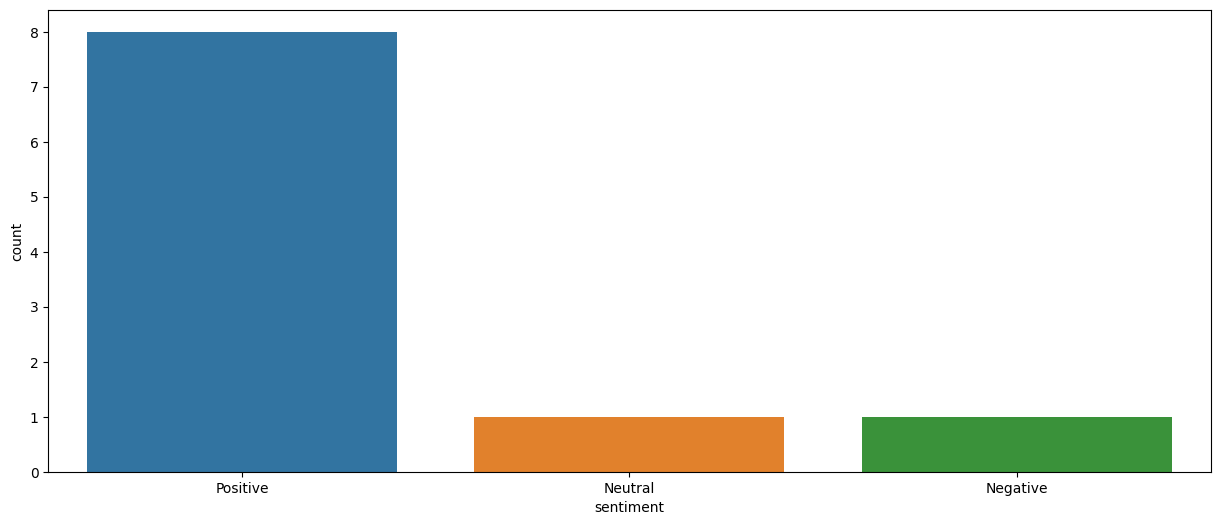

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='sentiment',data=data2)

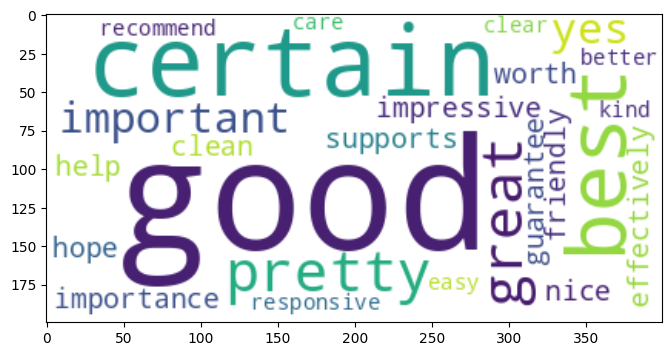

In [ ]:
#word cloud for positive words
positive = []
negative = []
neutral = []
for i in range(0,len(data2)):

    for j in range(0,len(data2.absolute_clean_reviews[i].split() )):

        word = data2.absolute_clean_reviews[i].split()[j]
        if  word in affinity_scores:
            a = affinity_scores[word]
            if a > 0:
                positive.append(word)
            elif a < 0:
                negative.append(word)
            else :
                neutral.append(word)

pos =' '.join(positive)
plt.figure(figsize=(8,4))
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(pos)
plt.imshow(word_cloud, interpolation='bilinear')

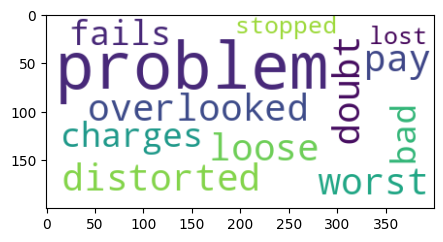

In [ ]:
#word cloud for negative words
neg = ' '.join(negative)
plt.figure(figsize=(5,5))
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(neg)
plt.imshow(word_cloud, interpolation='bilinear')

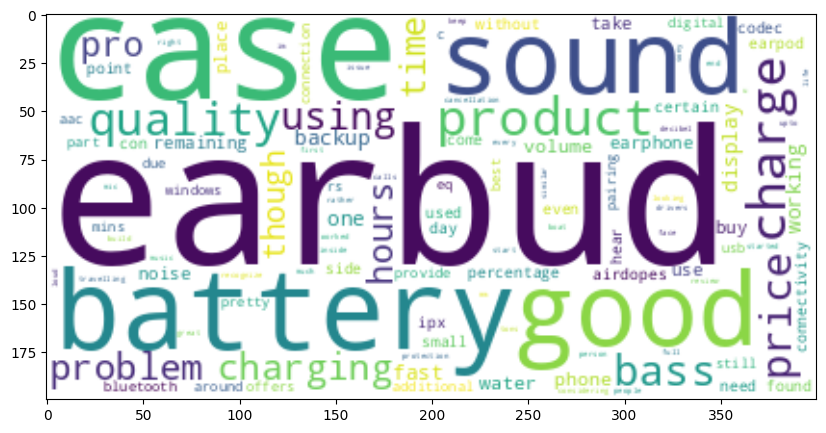

In [ ]:
#word cloud for all words
absolute_clean_reviews_string=' '.join(data2.absolute_clean_reviews)
plt.figure(figsize=(10,5))
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(absolute_clean_reviews_string)
plt.imshow(word_cloud, interpolation='bilinear')